## Price Predcition of Car  With  Machine Learning
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.


In [48]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
# Load the dataset
df = pd.read_csv("CarPrice.csv")

In [51]:
# Drop 'car_ID' column as it's not useful for analysis
df = df.drop(["car_ID"], axis=1)


In [52]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [53]:
# Check for null values
print("Null values in each column:\n", df.isnull().sum())


Null values in each column:
 symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [54]:
# Dataset shape
print("Shape of the dataset:", df.shape)


Shape of the dataset: (205, 25)


In [55]:

# Statistical summary of the dataset
print("Statistical summary:\n", df.describe())

Statistical summary:
         symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.0700

In [56]:
# Unique car names
print("Unique car names:", df.CarName.unique())


Unique car names: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 

In [57]:
# Fuel type distribution
print("Fuel types:\n", df.fueltype.value_counts())


Fuel types:
 fueltype
gas       185
diesel     20
Name: count, dtype: int64


In [58]:
# Aspiration types distribution
print("Aspiration types:\n", df.aspiration.value_counts())


Aspiration types:
 aspiration
std      168
turbo     37
Name: count, dtype: int64


In [59]:

# Door numbers distribution
print("Door numbers:\n", df.doornumber.value_counts())

Door numbers:
 doornumber
four    115
two      90
Name: count, dtype: int64


In [60]:
# Car body types distribution
print("Car body types:\n", df.carbody.value_counts())

Car body types:
 carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


In [61]:
# Drive wheel types distribution
print("Drive wheel types:\n", df.drivewheel.value_counts())

Drive wheel types:
 drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


In [62]:
# Engine location distribution
print("Engine location:\n", df.enginelocation.value_counts())


Engine location:
 enginelocation
front    202
rear       3
Name: count, dtype: int64


In [63]:

# Fuel system distribution
print("Fuel systems:\n", df.fuelsystem.value_counts())

Fuel systems:
 fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

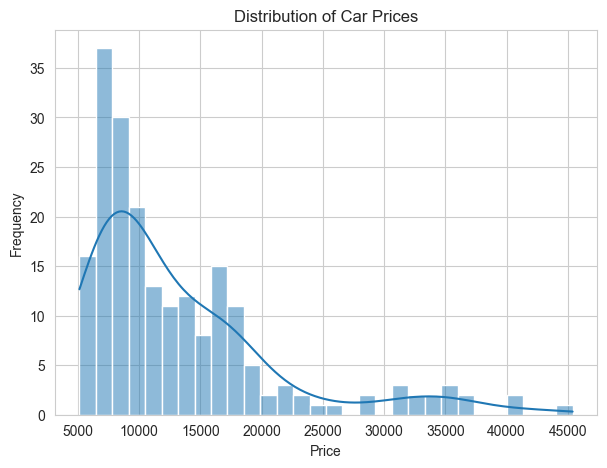

In [64]:
# Distribution plot of the car prices
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.histplot(df.price, kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show

<Figure size 900x900 with 0 Axes>

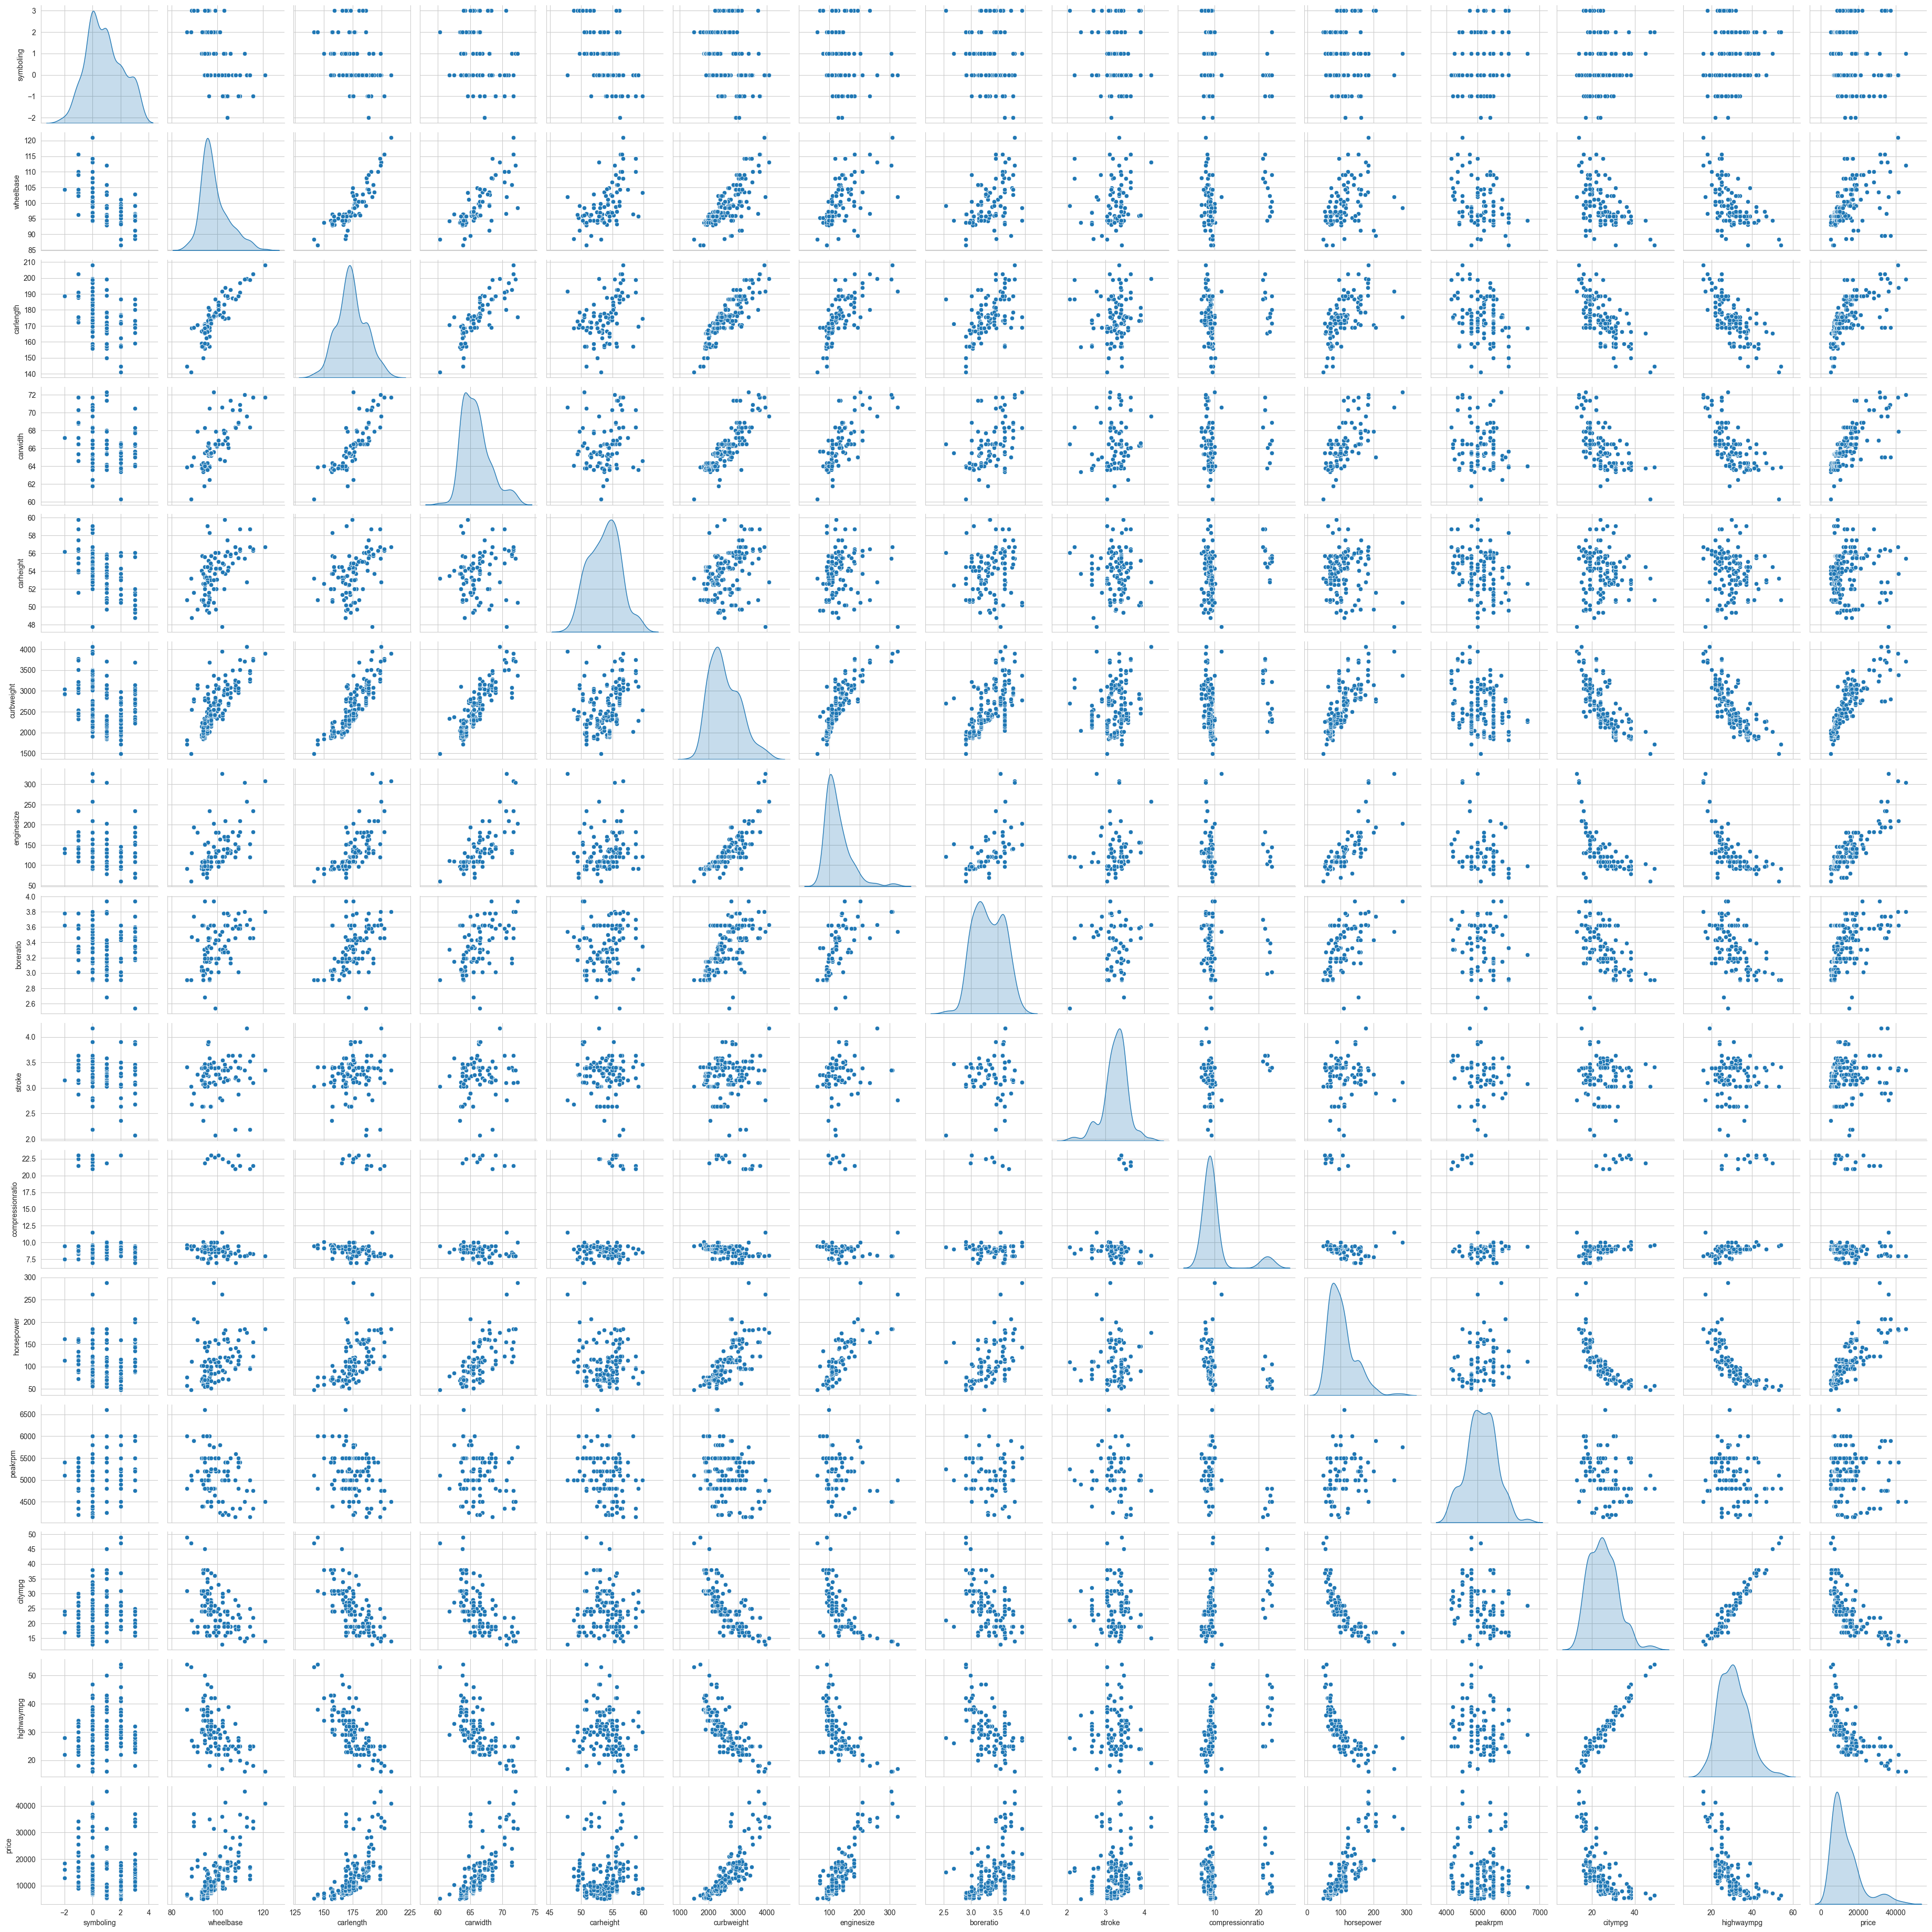

In [65]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(9, 9))
sns.pairplot(df, diag_kind="kde")
plt.show()


In [66]:
# Prepare data for training (excluding categorical columns)
x = df.drop(['price', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)
y = df['price']

In [67]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)


In [68]:
## Linear Regression model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_train)


In [69]:
# Evaluate the Linear Regression model
from sklearn import metrics

r2_lin = metrics.r2_score(y_train, y_pred_lin)
print("R-squared for Linear Regression:", r2_lin)


R-squared for Linear Regression: 0.8717560764119724


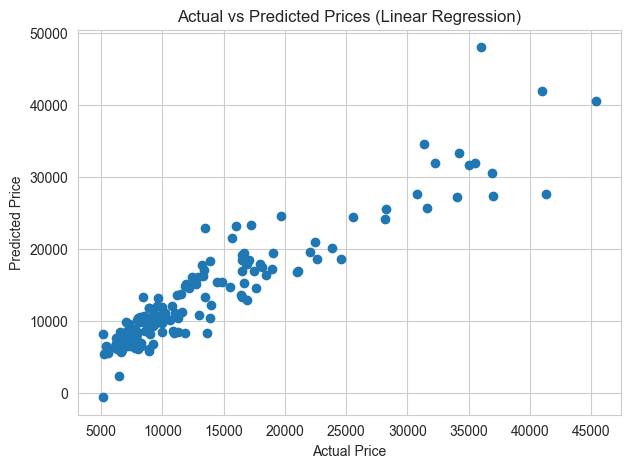

In [70]:
# Scatter plot for Actual vs Predicted prices (Linear Regression)
plt.figure(figsize=(7, 5))
plt.scatter(y_train, y_pred_lin)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


In [71]:
# Lasso Regression model
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_train)


In [72]:
# Evaluate the Lasso Regression model
r2_lasso = metrics.r2_score(y_train, y_pred_lasso)
print("R-squared for Lasso Regression:", r2_lasso)


R-squared for Lasso Regression: 0.8717550082371648


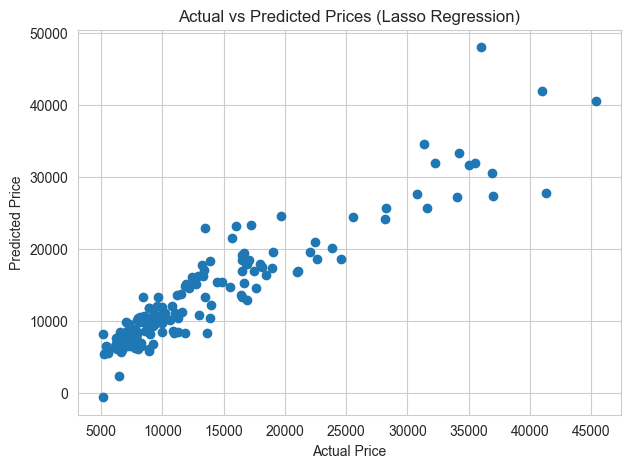

In [73]:
# Scatter plot for Actual vs Predicted prices (Lasso Regression)
plt.figure(figsize=(7, 5))
plt.scatter(y_train, y_pred_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Prices (Lasso Regression)")
plt.show()

### Conclusion
- In this task, I took Car Price dataset and performed Linear Regression and Lasso Regression Algorithms to make model.
- Many analyses of the dataset were performed.
- Many visualizations of the dataset were created.
- Finally, I plotted a graph for actual vs. predicted values.
